In [1]:
"""要件
* x=0, y=0 を中心として四角の螺旋を描くための座標をひとつずつ返却するジェネレータを作成する
* 螺旋は反時計回りに回転する
* 最初は原点からどちらの方向に移動しても良い
* sendメソッドで座標を開始座標を指定できる
* 座標は必ず整数値を取る
"""

'要件\n* x=0, y=0 を中心として四角の螺旋を描くための座標をひとつずつ返却するジェネレータを作成する\n* 螺旋は反時計回りに回転する\n* 最初は原点からどちらの方向に移動しても良い\n* sendメソッドで座標を開始座標を指定できる\n* 座標は必ず整数値を取る\n'

In [2]:
# プロットするためにmatplotlibを使う
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
"""案1: 象限毎に移動方向を変える
* if文が多すぎてダサい
"""

'案1: 象限毎に移動方向を変える\n* if文が多すぎてダサい\n'

In [4]:
def q1(x, y):
    """第一象限の回転ルール
    * 1. xの絶対値がyの絶対値より大きい時、xと同じになるまでyをインクリメントする
    * 2. xとyの絶対値が同じになったらxのデクリメントに転じる
    """
    if abs(x) > abs(y):
        y += 1
    else:
        x -= 1
    return x, y

In [5]:
def q2(x, y):
    """第二象限の回転ルール
    * 3. xの絶対値がyの絶対値より小さい時、yと同じになるまでxをデクリメントする
    * 4. xとyの絶対値が同じになったらyのデクリメントに転じる
    """
    if abs(x) < abs(y):
        x -= 1
    else:
        y -= 1

    return x, y

In [6]:
def q3(x, y):
    """第三象限の回転ルール
    * 5. xの絶対値がyの絶対値より大きい時、yと同じになるまでyをデクリメントする
    * 6. xとyの絶対値が同じになったらxのインクリメントに転じる
    """
    if abs(x) > abs(y):
        y -= 1
    else:
        x += 1
    return x, y

In [7]:
def q4(x, y):
    """第三象限の回転ルール
    * 7. xの絶対値がyの絶対値+1より小さい時、y+1と同じになるまでxをインクリメントする
    * 8. xとyの絶対値が同じになったらyのインクリメントに転じる
    """
    if abs(x) < abs(y) + 1:
        x += 1
    else:
        y += 1
    return x, y

In [8]:
def spiral(x=0, y=0):
    while True:
        received = yield x, y
        if received:
            # sendで座標を受け取った場合は次の座標から再開する
            x, y = received
        
        if x >= 0 and y > 0:
            x, y = q1(x, y)
        elif x < 0 and y >= 0:
            x, y = q2(x, y)
        elif x <= 0 and y < 0:
            x, y = q3(x, y)
        else:
            x, y = q4(x, y)

In [9]:
g = spiral(0, 0)

In [10]:
# next(g)

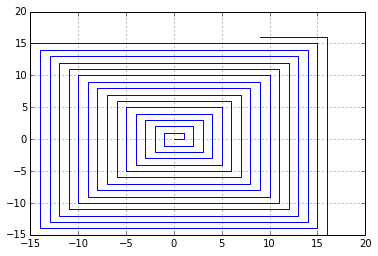

In [11]:
# g.send((0, 0))
xs = []
ys = []
for i in range(1000):
    x, y = next(g)
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, linestyle="-")
plt.grid()
plt.show()

In [12]:
"""案2: 特定の座標に達した時に方向転換するルールを決めておく
* 初期値は固定される
* sendメソッドで始点を指定できない
* (0,0)をプロットできない
"""

'案2: 特定の座標に達した時に方向転換するルールを決めておく\n* 初期値は固定される\n* sendメソッドで始点を指定できない\n* (0,0)をプロットできない\n'

In [13]:
# 向きを変える条件だけを変数に隔離
vectors = {
    # (x>=0, y>=0, xの絶対値-yの絶対値): (xの増加分, yの増加分),
    (True, True, 0): (-1, 0),
    (False, True, 0): (0, -1),
    (False, False, 0): (1, 0),
    (True, False, 1): (0, 1),
}

In [14]:
def spiral2():
    vector = (0, 1)
    x = 1
    y = 0
    while True:
        vector = vectors.get((x>=0, y>=0, abs(x)-abs(y)), vector)
        x += vector[0]
        y += vector[1]
        yield (x, y)

In [15]:
g = spiral2()

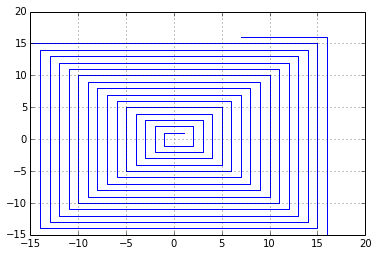

In [16]:
xs = []
ys = []
for i in range(1000):
    x, y = next(g)
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, linestyle="-")
plt.grid()
plt.show()

In [23]:
"""案3: 円の傾きからX,Y成分を抽出し、移動ルールとして利用する
* atan2関数が(0, 0)の場合に0を返却するため最初の移動方向が(0, 1)となる # (-sin(0), cos(0))
  * そのため第一象限で座標の四角の拡大が行われる
* 結局座標の判定と細々した判定でif文が必要になるため効率化されていない
"""

'案3: 円の傾きからX,Y成分を抽出し、移動ルールとして利用する\n* atan2関数が(0, 0)の場合に0を返却するため最初の移動方向が(0, 1)となる # (-sin(0), cos(0))\n  * そのため第一象限で座標の四角の拡大が行われる\n* 結局座標の判定と細々した判定でif文が必要になるため効率化されていない\n'

In [18]:
import math
from collections import namedtuple
point = namedtuple('Point', ['x', 'y'])

# 原点とする座標を象限毎に定義したものを定義
origins = {
    # (x>=0, y>=0, xの絶対値-yの絶対値): 原点の座標
    (True, True): point(0, 1),
    (False, True): point(0, 0),
    (False, False): point(0, 0),
    (True, False): point(0, 0),
}

# pi / 4, pi / 8
pi4 = math.pi / 4
pi8 = pi4 / 2
sqrt2 = math.sqrt(2)

In [19]:
def spiral3(x=0, y=0):
    while True:
        received = yield x, y
        if received:
            x, y = received
        origin = origins[(x>=0, y>=0)]
        # rad = math.atan2(y-origin.y, x-origin.x)
        rad = math.atan2(y-origin.y if x and y else y, x-origin.x if x and y else x)
        if rad % pi4 == 0:
            # (角を四角くするため)位置ベクトルと軸のなす角がπ/4のときはπ/8反時計回りに倒す
            rad += pi8
        
        # 1/√2で割った成分を座標にプラスする
        x += int(-math.sin(rad) * sqrt2)  # cos' = -sin
        y += int(math.cos(rad) * sqrt2)  # sin' = cos

In [20]:
g = spiral3()

In [21]:
# next(g)

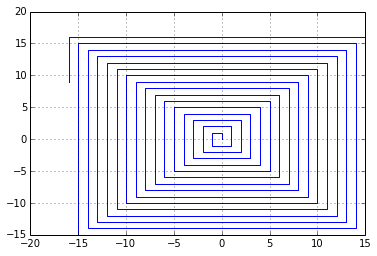

In [22]:
# g.send((0, 0))
xs = []
ys = []
for i in range(1000):
    x, y = next(g)
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, linestyle="-")
plt.grid()
plt.show()